Estimated coefficients:
b_0 = 1.2363636363636363 		
b_1 = 1.1696969696969697


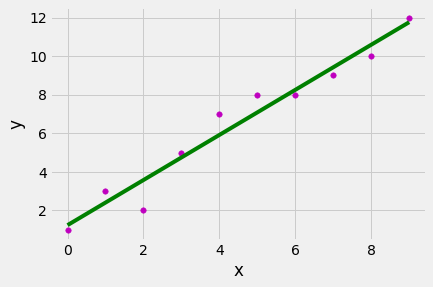

In [416]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

	# estimating coefficients
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


In [417]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

# load the boston dataset
boston = datasets.load_boston(return_X_y=False)

Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.720905667266178


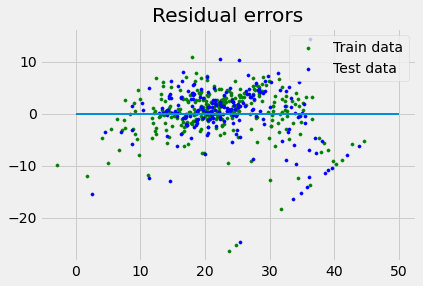

In [418]:
# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
													random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()

In [419]:
import numpy as np
import pandas as pd 


In [420]:
my_file = open('./headers.txt', 'r')
data = my_file.read()
headers = data.split("\n")
my_file.close()

dataset=pd.read_csv('./trainingset.txt', names=headers, header= None)
dataset = dataset.set_index('id')
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,output
id,,,,,,,,,,,,,,,,,
TR1,44,JobCat9,single,secondary,no,29,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
TR2,31,JobCat4,married,secondary,no,2,yes,yes,unknown,5,may,0,1,-1,0,unknown,TypeA
TR3,42,JobCat4,divorced,tertiary,yes,2,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
TR4,58,JobCat2,married,primary,no,121,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
TR5,43,JobCat9,single,secondary,no,593,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR24306,70,JobCat2,married,primary,no,324,no,no,cellular,15,nov,0,1,96,7,success,TypeA
TR24307,63,JobCat2,married,secondary,no,1495,no,no,cellular,16,nov,0,1,22,5,success,TypeA
TR24308,27,JobCat6,single,secondary,no,703,yes,no,cellular,16,nov,0,1,550,2,success,TypeB


In [421]:
target = dataset.iloc[:,[16]]

dummy = pd.get_dummies(target['output'])
dataset2 = pd.concat((target,dummy), axis=1 )
target = dataset2.drop(['output', 'TypeB'],axis = 1)
#target = target.to_numpy()
target

,TypeA
id,
TR1,1
TR2,1
TR3,1
TR4,1
TR5,1
...,...
TR24306,1
TR24307,1
TR24308,0


In [422]:
dataset = dataset.drop(['output'],axis = 1)
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
TR1,44,JobCat9,single,secondary,no,29,yes,no,unknown,5,may,0,1,-1,0,unknown
TR2,31,JobCat4,married,secondary,no,2,yes,yes,unknown,5,may,0,1,-1,0,unknown
TR3,42,JobCat4,divorced,tertiary,yes,2,yes,no,unknown,5,may,0,1,-1,0,unknown
TR4,58,JobCat2,married,primary,no,121,yes,no,unknown,5,may,0,1,-1,0,unknown
TR5,43,JobCat9,single,secondary,no,593,yes,no,unknown,5,may,0,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR24306,70,JobCat2,married,primary,no,324,no,no,cellular,15,nov,0,1,96,7,success
TR24307,63,JobCat2,married,secondary,no,1495,no,no,cellular,16,nov,0,1,22,5,success
TR24308,27,JobCat6,single,secondary,no,703,yes,no,cellular,16,nov,0,1,550,2,success


In [423]:
jobsplit = pd.get_dummies(dataset['job'])
maritalsplit = pd.get_dummies(dataset['marital'])
educationsplit = pd.get_dummies(dataset['education'])
defaultsplit = pd.get_dummies(dataset['default'])
housingsplit = pd.get_dummies(dataset['housing'])
loansplit = pd.get_dummies(dataset['loan'])
contactsplit = pd.get_dummies(dataset['contact'])
monthsplit = pd.get_dummies(dataset['month'])
poutcomesplit = pd.get_dummies(dataset['poutcome'])
jobsplit.columns = jobsplit.columns.str.replace('unknown','junknown')
educationsplit.columns = educationsplit.columns.str.replace('unknown','eunknown')
defaultsplit.columns = defaultsplit.columns.str.replace('yes','default_yes')
defaultsplit.columns = defaultsplit.columns.str.replace('no','default_no')
housingsplit.columns = housingsplit.columns.str.replace('yes','housing_yes')
housingsplit.columns = housingsplit.columns.str.replace('no','housing_no')
loansplit.columns = loansplit.columns.str.replace('yes','loan_yes')
loansplit.columns = loansplit.columns.str.replace('no','loan_no')
contactsplit.columns = contactsplit.columns.str.replace('unknown','cunknown')
poutcomesplit.columns = poutcomesplit.columns.str.replace('unknown','punknown')
dataset1 =  pd.concat((dataset,jobsplit), axis=1 )
dataset2 =  pd.concat((dataset1,maritalsplit), axis=1 )
dataset3 =  pd.concat((dataset2,educationsplit), axis=1 )
dataset4 =  pd.concat((dataset3,defaultsplit), axis=1 )
dataset5 =  pd.concat((dataset4,housingsplit), axis=1 )
dataset6 =  pd.concat((dataset5,loansplit), axis=1 )
dataset7 =  pd.concat((dataset6,contactsplit), axis=1 )
dataset8 = pd.concat((dataset7,monthsplit), axis=1 )
dataset9 = pd.concat((dataset8,poutcomesplit), axis=1 )
data3 = dataset9.drop(['job','marital','education','default','housing','loan','poutcome','month','contact'],axis = 1)
data3

,age,balance,day,duration,campaign,pdays,previous,JobCat1,JobCat10,JobCat11,...,jun,mar,may,nov,oct,sep,failure,other,success,punknown
id,,,,,,,,,,,,,,,,,,,,,
TR1,44,29,5,0,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
TR2,31,2,5,0,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
TR3,42,2,5,0,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
TR4,58,121,5,0,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
TR5,43,593,5,0,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR24306,70,324,15,0,1,96,7,0,0,0,...,0,0,0,1,0,0,0,0,1,0
TR24307,63,1495,16,0,1,22,5,0,0,0,...,0,0,0,1,0,0,0,0,1,0
TR24308,27,703,16,0,1,550,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [424]:
data3 = data3.to_numpy()
data3

array([[  44,   29,    5, ...,    0,    0,    1],
       [  31,    2,    5, ...,    0,    0,    1],
       [  42,    2,    5, ...,    0,    0,    1],
       ...,
       [  27,  703,   16, ...,    0,    1,    0],
       [  75, 3810,   16, ...,    0,    0,    0],
       [  59,  138,   16, ...,    0,    0,    0]], dtype=int64)

Coefficients:  [[ 8.60840559e-05 -1.76420128e-06 -1.78476101e-04 -4.97539510e-13
   4.18143598e-03  3.69121739e-05 -3.97079518e-03  4.00645358e-02
  -1.65036397e-03  3.25319259e-03 -6.79755698e-02  5.34398075e-03
   1.44200344e-02 -5.06035986e-02 -1.92615778e-03  1.05351482e-02
   5.27432413e-03  7.50427748e-03  3.57601968e-02 -3.86188533e-03
   1.57513573e-02 -1.18894720e-02  4.30220277e-03  4.10504265e-04
  -1.23969412e-02  7.68423421e-03 -1.19933253e-02  1.19933253e-02
  -2.40952438e-02  2.40952438e-02 -1.19676118e-02  1.19676118e-02
  -4.65960040e-02 -5.43136999e-03  5.20273740e-02  2.10543459e-02
   1.27100439e-01 -1.54347936e-01  4.57762063e-02  1.39969965e-01
   1.07270893e-01  1.59753693e-02 -2.32925992e-01  6.96153915e-02
   1.17006242e-01 -1.03238780e-01 -1.53256144e-01  1.28021372e-01
   1.01846569e-01 -3.40032104e-01  1.10164163e-01]]
Variance score: 0.1562308610039269


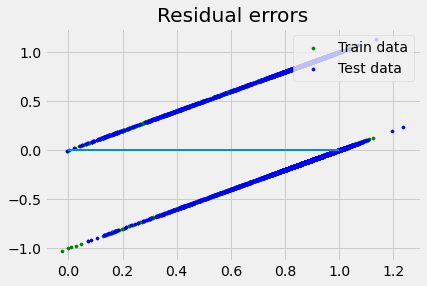

In [425]:
# defining feature matrix(X) and response vector(y)
X = data3
y = target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
													random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 1, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()

In [426]:
my_file = open('./headers.txt', 'r')
header = my_file.read()
headers = header.split("\n")
my_file.close()

queryset=pd.read_csv('./queries.txt', names=headers, header= None)
queryset = queryset.set_index('id')
queryset = queryset.drop(['output'],axis = 1)
queryset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
TEST1,58,JobCat6,married,tertiary,no,2143,yes,no,unknown,5,may,0,1,-1,0,unknown
TEST2,30,JobCat3,single,primary,no,23,yes,yes,unknown,5,may,0,1,-1,0,unknown
TEST3,53,JobCat9,married,secondary,no,-3,no,no,unknown,5,may,0,1,-1,0,unknown
TEST4,36,JobCat6,single,tertiary,no,424,yes,no,unknown,5,may,0,1,-1,0,unknown
TEST5,53,JobCat9,married,secondary,no,384,yes,no,unknown,5,may,0,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEST2696,36,JobCat6,single,tertiary,no,1373,no,no,cellular,22,oct,0,4,-1,0,unknown
TEST2697,31,JobCat11,married,secondary,no,51,yes,yes,cellular,25,oct,0,1,284,3,success
TEST2698,23,JobCat5,single,secondary,no,1868,no,no,cellular,26,oct,0,1,103,2,other


In [427]:
jobsplit = pd.get_dummies(queryset['job'])
maritalsplit = pd.get_dummies(queryset['marital'])
educationsplit = pd.get_dummies(queryset['education'])
defaultsplit = pd.get_dummies(queryset['default'])
housingsplit = pd.get_dummies(queryset['housing'])
loansplit = pd.get_dummies(queryset['loan'])
contactsplit = pd.get_dummies(queryset['contact'])
monthsplit = pd.get_dummies(queryset['month'])
poutcomesplit = pd.get_dummies(queryset['poutcome'])
jobsplit.columns = jobsplit.columns.str.replace('unknown','junknown')
educationsplit.columns = educationsplit.columns.str.replace('unknown','eunknown')
defaultsplit.columns = defaultsplit.columns.str.replace('yes','default_yes')
defaultsplit.columns = defaultsplit.columns.str.replace('no','default_no')
housingsplit.columns = housingsplit.columns.str.replace('yes','housing_yes')
housingsplit.columns = housingsplit.columns.str.replace('no','housing_no')
loansplit.columns = loansplit.columns.str.replace('yes','loan_yes')
loansplit.columns = loansplit.columns.str.replace('no','loan_no')
contactsplit.columns = contactsplit.columns.str.replace('unknown','cunknown')
poutcomesplit.columns = poutcomesplit.columns.str.replace('unknown','punknown')
queryset1 =  pd.concat((queryset,jobsplit), axis=1 )
queryset2 =  pd.concat((queryset1,maritalsplit), axis=1 )
queryset3 =  pd.concat((queryset2,educationsplit), axis=1 )
queryset4 =  pd.concat((queryset3,defaultsplit), axis=1 )
queryset5 =  pd.concat((queryset4,housingsplit), axis=1 )
queryset6 =  pd.concat((queryset5,loansplit), axis=1 )
queryset7 =  pd.concat((queryset6,contactsplit), axis=1 )
queryset8 = pd.concat((queryset7,monthsplit), axis=1 )
queryset9 = pd.concat((queryset8,poutcomesplit), axis=1 )
querydata = queryset9.drop(['job','marital','education','default','housing','loan','poutcome','month','contact'],axis = 1)
querydata

,age,balance,day,duration,campaign,pdays,previous,JobCat1,JobCat10,JobCat11,...,jun,mar,may,nov,oct,sep,failure,other,success,punknown
id,,,,,,,,,,,,,,,,,,,,,
TEST1,58,2143,5,0,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
TEST2,30,23,5,0,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
TEST3,53,-3,5,0,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
TEST4,36,424,5,0,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
TEST5,53,384,5,0,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEST2696,36,1373,22,0,4,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
TEST2697,31,51,25,0,1,284,3,0,0,1,...,0,0,0,0,1,0,0,0,1,0
TEST2698,23,1868,26,0,1,103,2,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [428]:
# defining feature matrix(X) and response vector(y)
X_train = data3
y_train = target


# splitting X and y into training and testing sets
#from sklearn.model_selection import train_test_split
#X_train, y_train = train_test_split(X, y)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [[ 1.13445933e-04 -2.13082978e-06 -3.29596043e-04  5.16899024e-13
   4.30994446e-03  3.35007556e-05 -4.43671595e-03  2.46643649e-02
  -1.31235070e-02  1.44445169e-03 -5.64295850e-02  5.09564173e-03
   1.27010967e-02 -3.20969510e-02  2.54185735e-03  8.35204764e-03
   1.53808488e-02  3.74799922e-03  2.77217350e-02 -3.08777060e-03
   1.50050154e-02 -1.19172448e-02  1.23196704e-02  1.94656622e-04
  -1.26344387e-02  1.20111610e-04 -7.50883321e-03  7.50883321e-03
  -2.44895457e-02  2.44895457e-02 -1.31566423e-02  1.31566423e-02
  -4.20236521e-02 -5.18446093e-03  4.72081130e-02  2.03705532e-02
   1.19552008e-01 -1.65379837e-01  5.80038491e-02  1.47510592e-01
   9.85374727e-02  2.69260683e-02 -2.51850089e-01  6.74956397e-02
   1.24165779e-01 -1.09735685e-01 -1.35596352e-01  1.25958038e-01
   8.68733112e-02 -3.28354711e-01  1.15523362e-01]]


In [429]:
querytarget = reg.predict(querydata)
querytarget

array([[0.97396686],
       [1.00220666],
       [0.94302854],
       ...,
       [0.56544716],
       [0.86504523],
       [0.89857621]])

Variance score: 1.0


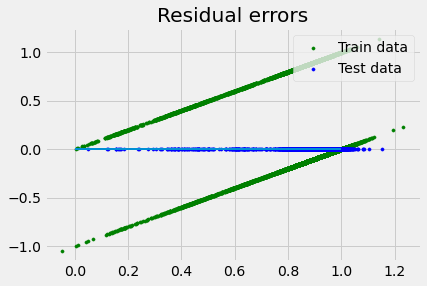

In [430]:
X_test = querydata
y_test = querytarget

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 1, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()

In [431]:
Query=pd.read_csv('./queries.txt', names=headers, header= None)
Test = Query['id']
Query = Query.set_index('id')
Query

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,output
id,,,,,,,,,,,,,,,,,
TEST1,58,JobCat6,married,tertiary,no,2143,yes,no,unknown,5,may,0,1,-1,0,unknown,?
TEST2,30,JobCat3,single,primary,no,23,yes,yes,unknown,5,may,0,1,-1,0,unknown,?
TEST3,53,JobCat9,married,secondary,no,-3,no,no,unknown,5,may,0,1,-1,0,unknown,?
TEST4,36,JobCat6,single,tertiary,no,424,yes,no,unknown,5,may,0,1,-1,0,unknown,?
TEST5,53,JobCat9,married,secondary,no,384,yes,no,unknown,5,may,0,1,-1,0,unknown,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEST2696,36,JobCat6,single,tertiary,no,1373,no,no,cellular,22,oct,0,4,-1,0,unknown,?
TEST2697,31,JobCat11,married,secondary,no,51,yes,yes,cellular,25,oct,0,1,284,3,success,?
TEST2698,23,JobCat5,single,secondary,no,1868,no,no,cellular,26,oct,0,1,103,2,other,?


In [432]:
threshold = 0.5
length = len(y_test)
for i in range(length):
    if(y_test[i] > threshold):
        Test[i]="TEST"+str(i+1)+",TypeA"
    else:
        Test[i]="TEST"+str(i+1)+",TypeB"
Test

0          TEST1,TypeA
1          TEST2,TypeA
2          TEST3,TypeA
3          TEST4,TypeA
4          TEST5,TypeA
             ...      
2695    TEST2696,TypeA
2696    TEST2697,TypeB
2697    TEST2698,TypeA
2698    TEST2699,TypeA
2699    TEST2700,TypeA
Name: id, Length: 2700, dtype: object

In [434]:
Test.to_csv(r'c:\Users\lukeh\Documents\College\4th-Year\Machine Learning\d20125299_predictions.txt', header=None, index=None, sep=' ', mode='a')